# 什么是窗函数？

窗函数能够产生一段特定的信号，假定为w

我们假设一段信号为x，给这段信号加窗，指的是将x乘上w

下面的代码说明了这个过程

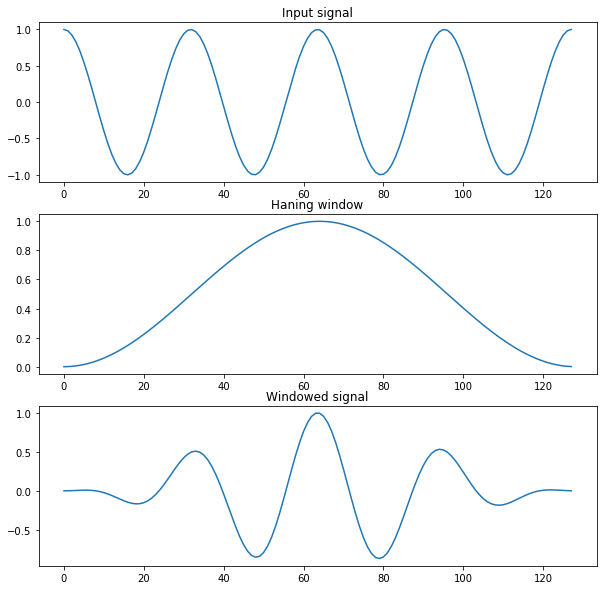

In [11]:
import numpy as np
from scipy.signal import get_window
import matplotlib.pyplot as plt
%matplotlib inline

M = 128                                     # 信号的长度
x = np.cos( np.linspace(0, 8*np.pi, 128) )  # 生成一段cos信号
w = get_window('hanning', M)                # 调用窗函数，生成w（hanning是一种窗函数）

xw = x*w                                    # 加窗

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.plot(x);plt.title('Input signal')
plt.subplot(312)
plt.plot(w);plt.title('Haning window')
plt.subplot(313)
plt.plot(xw);plt.title('Windowed signal')

plt.show()

# 窗函数的作用是什么？

## 1.防止泄露（关于泄露，参见[什么是泄漏？](hhttps://mp.weixin.qq.com/s?__biz=MzI5NTM0MTQwNA==&mid=2247484164&idx=1&sn=fdaf2164306a9ca4166c2aa8713cacc5&scene=21#wechat_redirect)）
在信号处理中，我们通常对信号进行截断分析，如果信号截断为非周期截断，那么频谱将发生泄露。通过加窗，可以减少频谱的泄露。我们可以这么想象，窗函数可以将一个非周期的信号，强行编程一个周期的信号。

下面的代码展示了什么是泄露，已经窗函数可以减少泄露
可以从（c）和（d）的对比中看到，加窗后可以有效的减少泄露

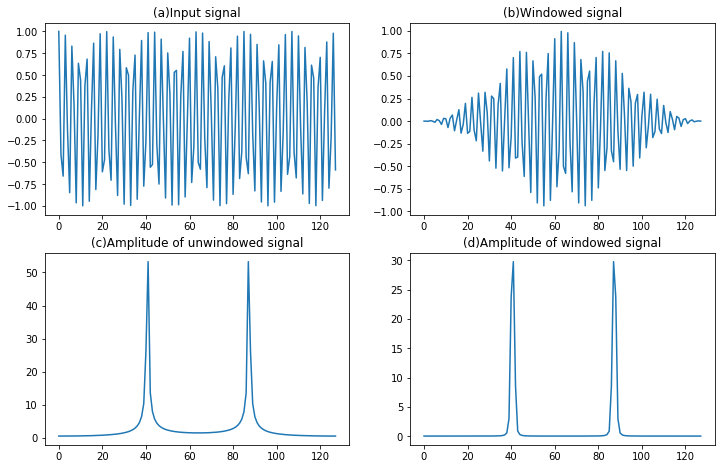

In [26]:
import numpy as np
from scipy.signal import get_window
from scipy.fftpack import fft

import matplotlib.pyplot as plt

%matplotlib inline

M = 128                                           # 信号的长度
x = np.cos( np.linspace(0, 80.7*np.pi, 128) )     # 生成一段非周期信号
w = get_window('hanning', M)                      # 调用窗函数，生成w（hanning是一种窗函数）

X = fft(x)
mX = np.abs(X)

xw = x*w                                          # 加窗
XW = fft(xw)
mXW = np.abs(XW)

plt.figure(figsize=(12,12))
plt.subplot(321)
plt.plot(x);plt.title('(a)Input signal')
plt.subplot(322)
plt.plot(xw);plt.title('(b)Windowed signal')
plt.subplot(323)
plt.plot(mX);plt.title('(c)Amplitude of unwindowed signal')
plt.subplot(324)
plt.plot(mXW);plt.title('(d)Amplitude of windowed signal')

plt.show()

## 2. 分析意义

一个加窗后的信号，它的傅里叶变换结果可以表示为窗函数的傅里叶变换。非常神奇的性质，并且在信号分析中非常重要，见如下证明

![trans_of_window_sinewave](imgs/trans_of_window_sinewave.png)

# 有哪些常用的窗函数？它们特点是什么？

窗函数有很多很多种，Scipy中的get_window提供了多种窗函数的实现，具体请参看[scipy.signal.get_window](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html)

每种窗函数都可以由两个特征来区别：主瓣的宽度（main-lobe width）和副瓣最大高度（side-lobe level）

![analysis_window](imgs/analysis_window.png)

下面介绍几种常用的窗函数

## Rectangular

$$
w[n] = \begin{cases}
1, &\text{n=-M/2,...,0,...,M/2}\\
0, &\text{n=elsewhere}
\end{cases}
$$

$$W[k] = \frac{\pi k}{\pi k/M}$$

**main-lobe width: 2 bins**

**side-lobe level: -13.3db**

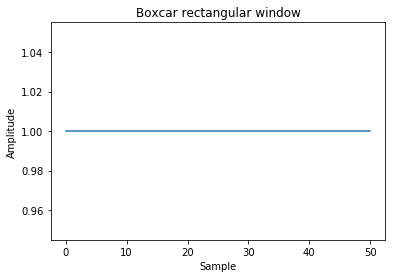

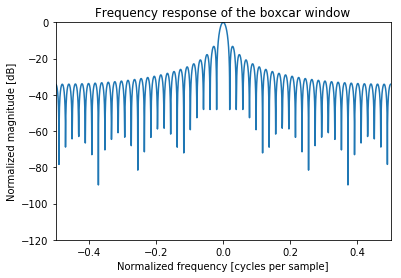

In [53]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

window = signal.boxcar(51)
plt.plot(window)
plt.title("Boxcar rectangular window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the boxcar window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")


## Hanning

$$w[n] = 0.5+0.5*\cos (2\pi n/M)$$
$$W[k] = 0.5D[k] + 0.25(D[k-1] + D[k+1]), D[k] = \frac{\sin (\pi k)}{\pi k/M}$$

**main-lobe width: 4 bins**

**side-lobe level: -31.5db**

E:\ProgramData\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


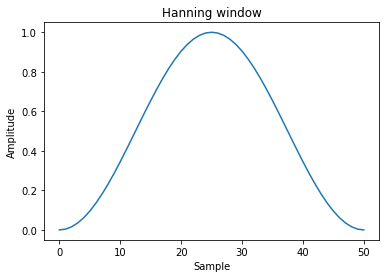

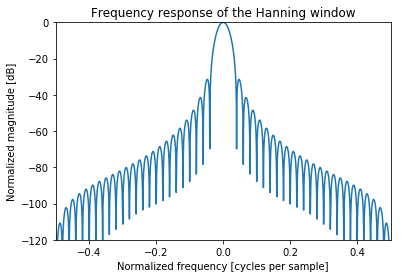

In [54]:
window = signal.hanning(51)
plt.plot(window)
plt.title("Hanning window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Hanning window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

## Hamming

$$w[n] = 0.54+46*\cos (2\pi n/M)$$

**main-lobe width: 4 bins**

**side-lobe level: -42.7db**

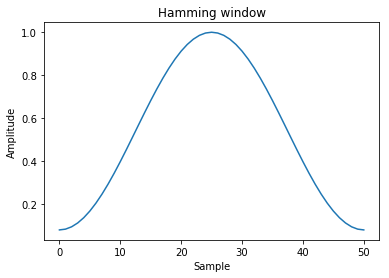

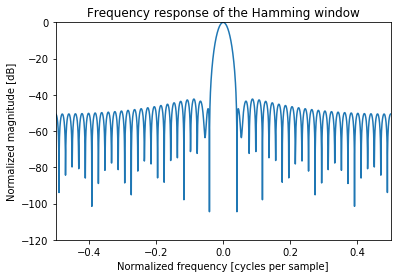

In [55]:
window = signal.hamming(51)
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Hamming window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

## Blackman

$$w[n] = 0.42 - 0.5\cos(2\pi n/M) + 0.08\cos(4\pi n/M)$$

**main-lobe width: 6 bins**

**side-lobe level: -58db**

E:\ProgramData\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


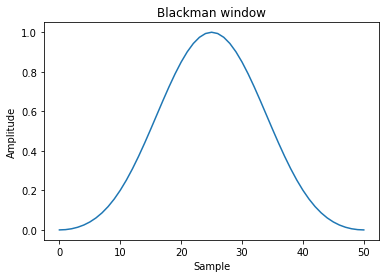

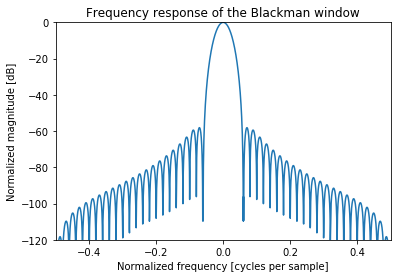

In [56]:
window = signal.blackman(51)
plt.plot(window)
plt.title("Blackman window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Blackman window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

## Blackman-Harris

$$w[n] = \frac{1}{M}\sum_{i=0}^{3} \alpha_i \cos(2n/\pi/M), \alpha_0=0.35875, \alpha_1=0.35875, \alpha_1=0.35875, \alpha_3=0.35875$$

**main-lobe width: 8 bins**

**side-lobe level: -92 db**

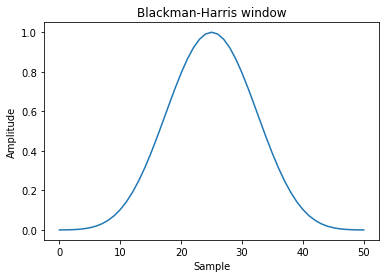

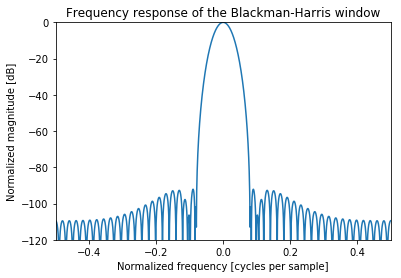

In [58]:
window = signal.blackmanharris(51)
plt.plot(window)
plt.title("Blackman-Harris window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.figure()
A = fft(window, 2048)
freq = np.linspace(-0.5, 0.5, len(A))
response = 20 * np.log10(np.abs(fftshift(A / abs(A).max())))
plt.plot(freq, response)
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Frequency response of the Blackman-Harris window")
plt.ylabel("Normalized magnitude [dB]")
plt.xlabel("Normalized frequency [cycles per sample]")

# 总结

本文中，我们首先介绍了窗函数的定义，说明了窗函数能够减少信号泄露，并且在信号分析非常的便利，然后我们又介绍了常见的几种窗函数和它们的性质